<a href="https://www.kaggle.com/code/mikhail1681/wild-salmon-catch-prediction?scriptVersionId=165688316" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salmon-catch-statistics-for-scotland-19522022/SalmonandSeaTroutNets1952-2022.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/salmon-catch-statistics-for-scotland-19522022/SalmonandSeaTroutNets1952-2022.csv')

In [4]:
df.head()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [5]:
df.tail()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
23138,Tweed,101.0,1.0,East,Net and Coble: Released,2022.0,September,9.0,2.0,14.7,...,0.0,2.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23139,Ythan,106.0,9.0,North East,Net and Coble: Released,2022.0,August,8.0,1.0,5.0,...,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

In [7]:
df.describe()

,District ID,Report order,Year,Month number,Wild MSW number,Wild MSW weight (kg),Wild 1SW number,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
count,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000,23140.000000
mean,56.267545,43.906828,1976.433794,6.028781,234.774503,1137.728384,346.497364,881.932226,229.061538,258.005052,0.002766,0.002182,0.097623,0.425190,0.109594,0.282239,24.137878
std,32.715546,35.787668,16.645369,1.793270,730.544329,3756.927117,1308.250523,3426.441037,1026.370657,1306.411901,0.087664,0.076901,1.763693,8.164855,2.221477,6.221872,146.277418
min,1.000000,1.000000,1952.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,10.000000,1963.000000,5.000000,4.000000,18.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,49.000000,30.000000,1975.000000,6.000000,30.000000,136.500000,8.000000,19.500000,6.000000,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,91.000000,81.000000,1987.000000,7.000000,161.000000,739.925000,152.000000,378.825000,49.000000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,109.000000,108.000000,2022.000000,11.000000,18942.000000,102188.000000,34633.000000,103010.800000,26126.000000,46142.600000,5.000000,5.700000,129.000000,621.800000,209.000000,639.600000,2215.000000


In [8]:
df.isna().sum()

District                  3
District ID               3
Report order              3
Region                    3
Method                    3
Year                      3
Month                     3
Month number              3
Wild MSW number           3
Wild MSW weight (kg)      3
Wild 1SW number           3
Wild 1SW weight (kg)      3
Sea trout number          3
Sea trout weight (kg)     3
Finnock number            3
Finnock weight (kg)       3
Farmed MSW number         3
Farmed MSW weight (kg)    3
Farmed 1SW number         3
Farmed 1SW weight (kg)    3
Netting effort            3
dtype: int64

In [9]:
df = df[:-3]

In [10]:
df['Year'].astype('int64')

0        1952
1        1952
2        1952
3        1952
4        1952
         ... 
23135    2022
23136    2022
23137    2022
23138    2022
23139    2022
Name: Year, Length: 23140, dtype: int64

In [11]:
df.loc[:, 'Wild MSW weight (t)'] = df['Wild MSW weight (kg)'] / 1000
df.loc[:, 'Wild 1SW weight (t)'] = df['Wild 1SW weight (kg)'] / 1000
df.loc[:, 'Sea trout weight (t)'] = df['Sea trout weight (kg)'] / 1000
df.loc[:, 'Finnock weight (t)'] = df['Finnock weight (kg)'] / 1000

In [12]:
df.loc[:, 'Wild fish (t)'] = df['Wild MSW weight (t)'] + df['Wild 1SW weight (t)'] + df['Sea trout weight (t)'] + df['Finnock weight (t)']

In [13]:
df.loc[:, 'Farmed MSW weight (t)'] = df['Farmed MSW weight (kg)']/1000
df.loc[:, 'Farmed 1SW weight (t)'] = df['Farmed 1SW weight (kg)']/1000

In [14]:
df.loc[:, 'Farmed fish (t)'] = df['Farmed MSW weight (t)'] + df['Farmed 1SW weight (t)']

In [15]:
yearly_wild_fish = df.groupby('Year')['Wild fish (t)'].sum()
yearly_farmed_fish = df.groupby('Year')['Farmed fish (t)'].sum()

<Figure size 1000x600 with 0 Axes>

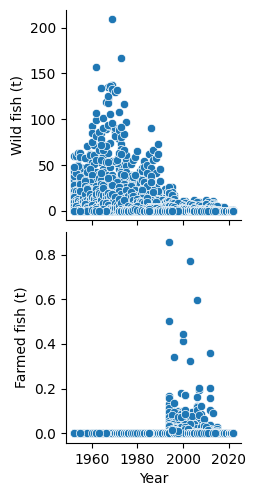

In [16]:
plt.figure(figsize=(10,6))
sns.pairplot(df, y_vars=['Wild fish (t)', 'Farmed fish (t)'], 
             x_vars=['Year'], kind='scatter');

In [17]:
# Рассчитываем суммарное усилие по методам
method_effort = df.groupby('Method')['Netting effort'].sum()

In [18]:
# Рассчитываем суммарное количество выловленной дикой рыбы по методам
method_wild_fish = df.groupby('Method')['Wild fish (t)'].sum()

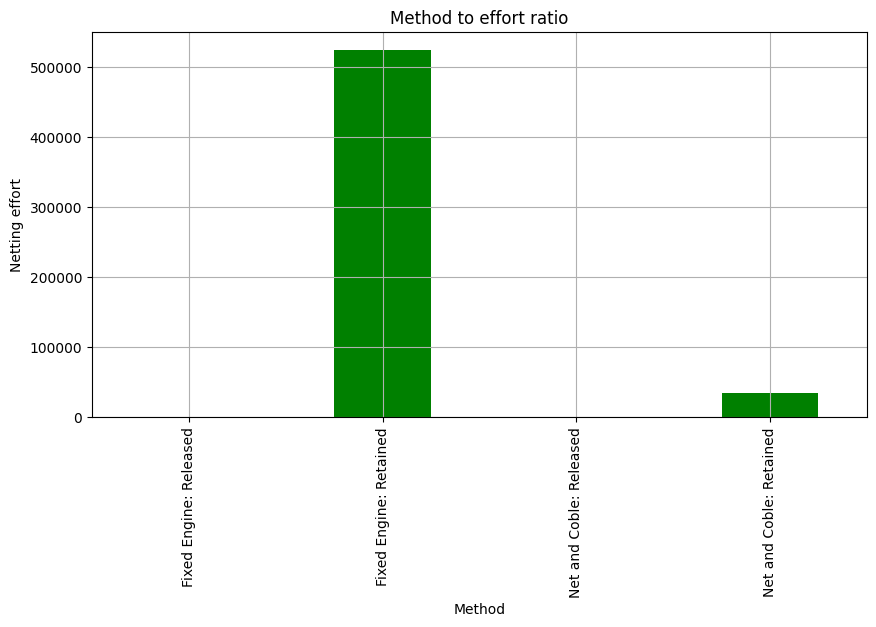

In [19]:
plt.figure(figsize=(10, 5))
method_effort.plot(kind='bar', color='green')
plt.title('Method to effort ratio')
plt.xlabel('Method')
plt.ylabel('Netting effort')
plt.xticks(rotation=90)
plt.grid(True);

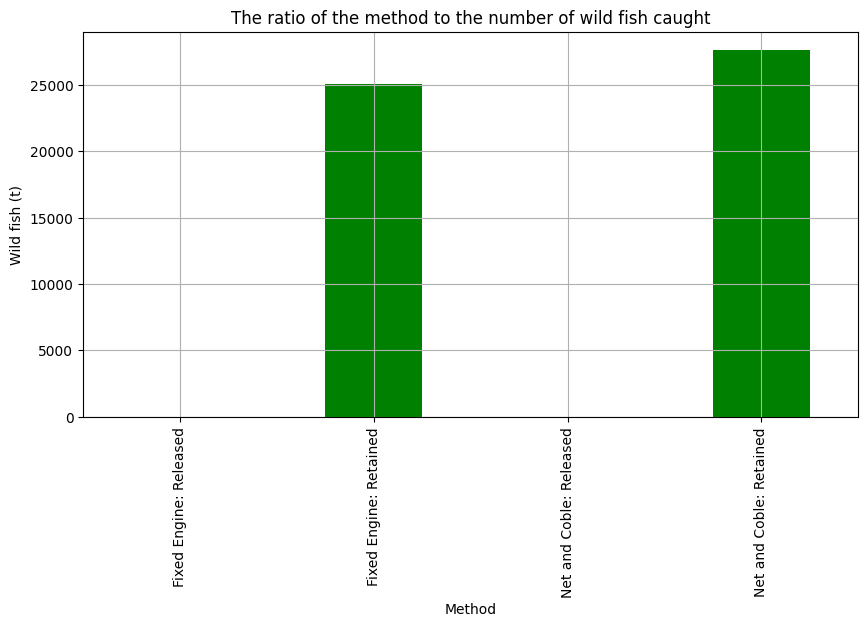

In [20]:
plt.figure(figsize=(10, 5))
method_wild_fish.plot(kind='bar', color='green')
plt.title('The ratio of the method to the number of wild fish caught')
plt.xlabel('Method')
plt.ylabel('Wild fish (t)')
plt.xticks(rotation=90)
plt.grid(True);

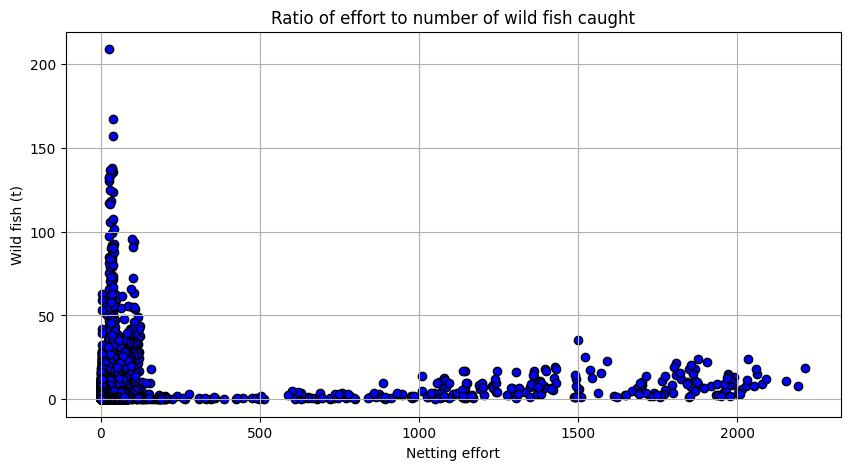

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Netting effort'], df['Wild fish (t)'], color='blue', edgecolor='black', linewidth=1)
plt.title('Ratio of effort to number of wild fish caught')
plt.xlabel('Netting effort')
plt.ylabel('Wild fish (t)')
plt.grid(True) 

In [22]:
df.columns

Index(['District', 'District ID', 'Report order', 'Region', 'Method', 'Year',
       'Month', 'Month number', 'Wild MSW number', 'Wild MSW weight (kg)',
       'Wild 1SW number', 'Wild 1SW weight (kg)', 'Sea trout number',
       'Sea trout weight (kg)', 'Finnock number', 'Finnock weight (kg)',
       'Farmed MSW number', 'Farmed MSW weight (kg)', 'Farmed 1SW number',
       'Farmed 1SW weight (kg)', 'Netting effort', 'Wild MSW weight (t)',
       'Wild 1SW weight (t)', 'Sea trout weight (t)', 'Finnock weight (t)',
       'Wild fish (t)', 'Farmed MSW weight (t)', 'Farmed 1SW weight (t)',
       'Farmed fish (t)'],
      dtype='object')

In [23]:
indicators = df[['Netting effort', 'Wild MSW weight (t)', 'Wild 1SW weight (t)',
    'Sea trout weight (t)', 'Finnock weight (t)', 'Wild fish (t)', 'Farmed fish (t)']]

Text(0.5, 1.0, 'Correlation Heatmap without Categorical Variables')

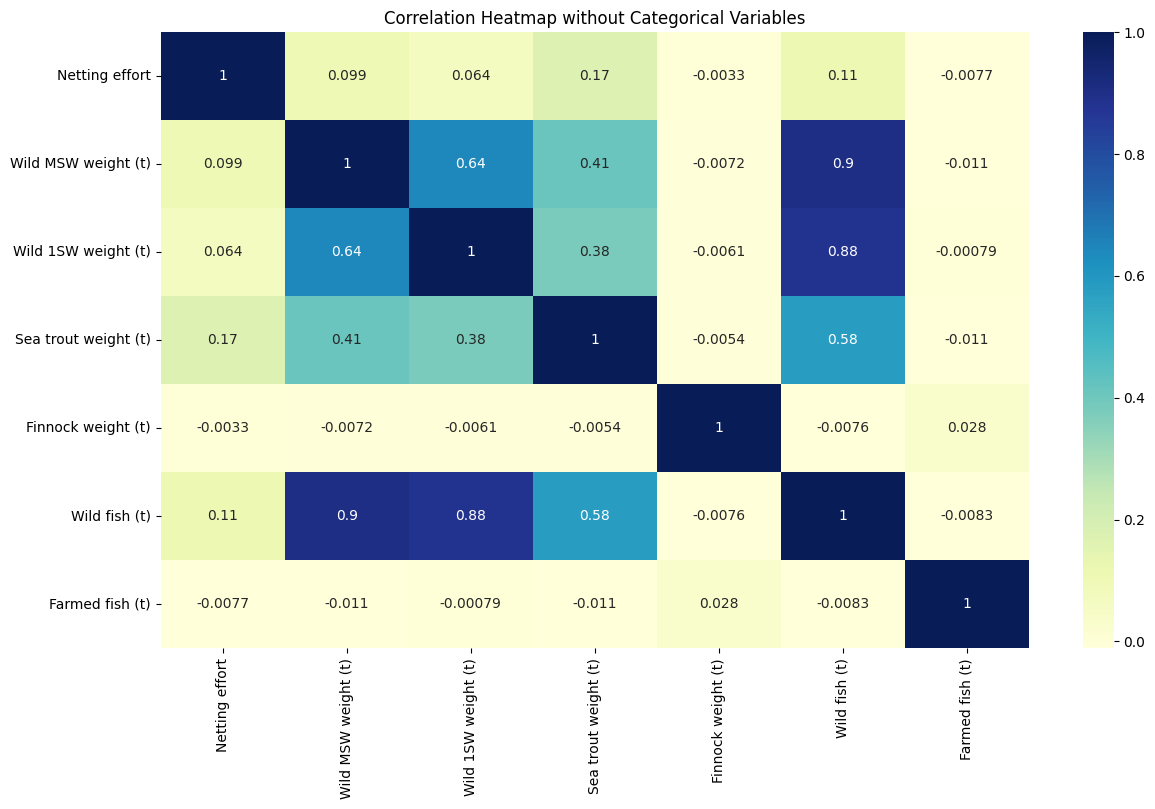

In [24]:
# Построение тепловой карты корреляции
plt.figure(figsize=(14, 8))
sns.heatmap(indicators.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap without Categorical Variables')

In [25]:
X = df[['Wild MSW weight (t)', 'Wild 1SW weight (t)',
    'Sea trout weight (t)', 'Finnock weight (t)']]

In [26]:
y = df['Wild fish (t)']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor(n_estimators=100, random_state=101)

In [31]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=101)

In [32]:
model.score(X_test, y_test)

0.9879906493737286

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
mse = mean_squared_error(y_test, y_pred)

In [36]:
mse

0.5844653761453416

In [37]:
mae = mean_absolute_error(y_test, y_pred)

In [38]:
mae

0.08111003522039761

In [39]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [40]:
RMSE

0.764503352605691